<a href="https://colab.research.google.com/github/ta269uec/nlppapers/blob/main/smart_hive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt

In [3]:
fpath =  "/content/drive/MyDrive/Colab Notebooks/analysis_file_062723.txt"

In [4]:
def read_input_file(fname):
  lines = None
  with open(fpath) as file:
    lines = [line.rstrip() for line in file]
  return lines

def read_records(lines):
  start_idx, record_size = 0, 11
  end_idx = start_idx+record_size
  records = []

  while end_idx <= len(lines) and start_idx < len(lines):
    records.append(process_record(lines[start_idx:end_idx]))
    start_idx = end_idx + 1
    end_idx = start_idx+record_size
  return records

def process_record(r):
  key = r[0]
  lux = float(r[1].split(",")[-1])
  x = list(zip(*[r[i].split(",") for i in range(2, 7)]))
  temp, humidity = sum(map(lambda x: float(x), x[0]))/5.0, sum(map(lambda x: float(x), x[1]))/5.0
  cap = [sum(map(lambda x: float(x), r[i].split(",")))/12.0 for i in range(7, 11)]
  processed_record = {
      "key":key,
      "lux":lux,
      "temp":temp,
      "humidity":humidity,
      "cap":cap
  }
  return processed_record

In [5]:
lines = read_input_file(fpath)
records = read_records(lines)

In [6]:
time_idx = sorted(list(set([int(r["key"]) for r in records])))

time_records = {}
for r in records:
  if int(r["key"]) not in time_records:
    time_records[int(r["key"])] = r

In [29]:
def plotter(ypoints, x_label, y_label, p_title, is_scatter = False):
  plt.title(p_title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  if is_scatter:
    # if scatter plot, then ypoints is a list of 2 lists
    plt.scatter(ypoints[0], ypoints[1])
  else:
    plt.plot(ypoints, linestyle = 'dotted')
  plt.grid()
  plt.show()

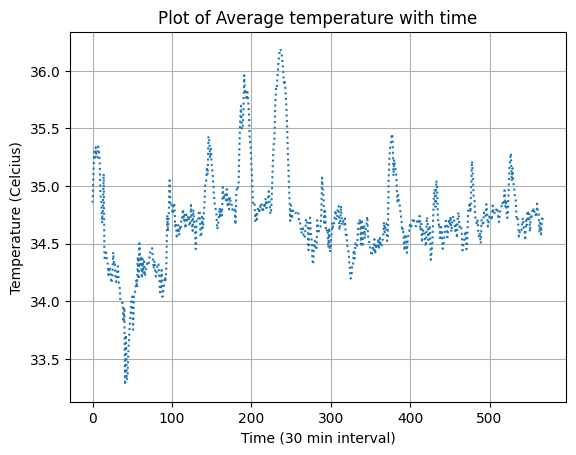

In [8]:
# Plotting temp against time
ypoints = [time_records[tidx]["temp"] for tidx in time_idx]
x_label = "Time (30 min interval)"
y_label = "Temperature (Celcius)"
p_title = "Plot of Average temperature with time"

plotter(ypoints, x_label, y_label, p_title)

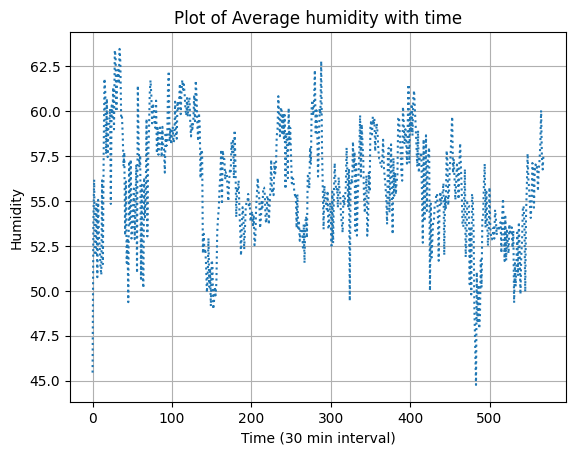

In [9]:
# Plotting humidity against time
ypoints = [time_records[tidx]["humidity"] for tidx in time_idx]
x_label = "Time (30 min interval)"
y_label = "Humidity"
p_title = "Plot of Average humidity with time"

plotter(ypoints, x_label, y_label, p_title)

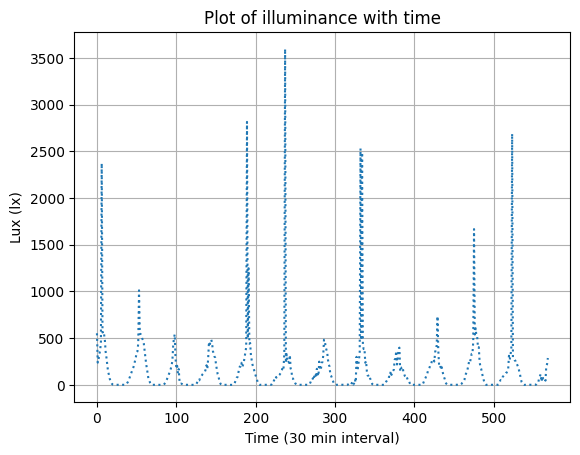

In [10]:
# Plotting illuminance against time
ypoints = [time_records[tidx]["lux"] for tidx in time_idx]
x_label = "Time (30 min interval)"
y_label = "Lux (lx)"
p_title = "Plot of illuminance with time"

plotter(ypoints, x_label, y_label, p_title)

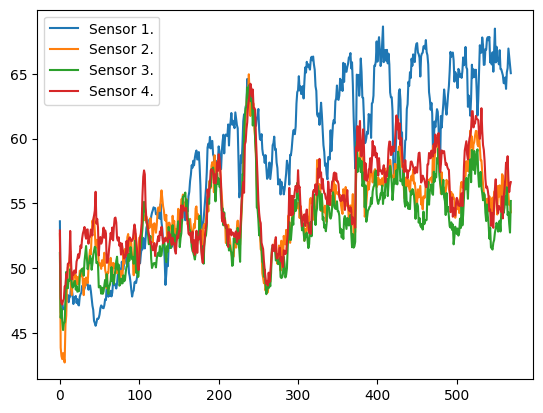

In [11]:
ypoints = list(zip(*[time_records[tidx]["cap"] for tidx in time_idx]))

for i in range(4):
  plt.plot(ypoints[i], label=f"Sensor {i+1}.")

plt.legend()
plt.show()

In [34]:
from scipy.stats import pearsonr, linregress

def get_pearson_corr(X1, X2):
  # Apply the pearsonr()
  corr, _ = pearsonr(X1, X2)
  return corr

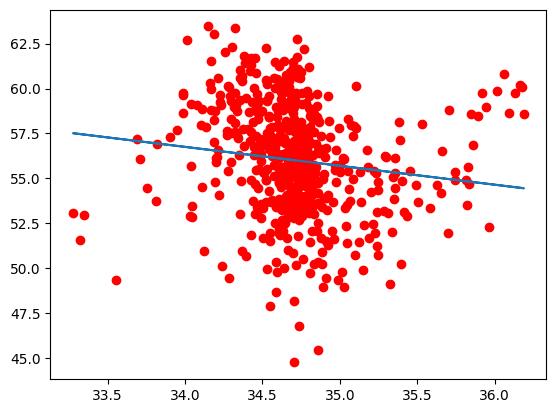

In [42]:
# Find correlation between temp and humidity
X1 = [time_records[idx]['temp'] for idx in time_idx]
X2 = [time_records[idx]['humidity'] for idx in time_idx]

correlation = round(get_pearson_corr(X1, X2), 4)
slope, intercept, r_value, p_value, std_err = linregress(X1, X2)

#plotter(ypoints=[X1,X2], x_label="Temperature Celcius", y_label="Humidity", p_title=f"Scatterplot of Temperature vs humidity. Pearson Coefficient = {correlation}", is_scatter=True)

plt.scatter(X1,X2, color='red')
yfit = [intercept + slope * xi for xi in X1]
plt.plot(X1, yfit)

0.0967 0.0009964256987573898 54.1865621062294 0.09672131606549576 0.021026853218544857 0.0004306160533679461


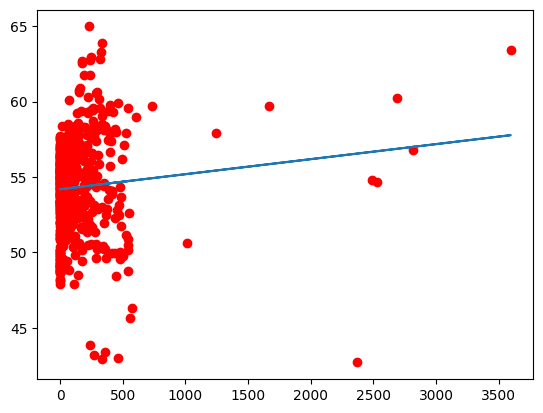

In [47]:
# Find correlation between lux and cap
X1 = [time_records[idx]['lux'] for idx in time_idx]
X2 = [time_records[idx]['cap'][1] for idx in time_idx]

correlation = round(get_pearson_corr(X1, X2), 4)
slope, intercept, r_value, p_value, std_err = linregress(X1, X2)

#plotter(ypoints=[X1,X2], x_label="Temperature Celcius", y_label="Humidity", p_title=f"Scatterplot of Temperature vs humidity. Pearson Coefficient = {correlation}", is_scatter=True)

plt.scatter(X1,X2, color='red')
yfit = [intercept + slope * xi for xi in X1]
plt.plot(X1, yfit)

print(correlation, slope, intercept, r_value, p_value, std_err)

In [44]:
time_records[1]

{'key': '1',
 'lux': 551.76,
 'temp': 34.85600000000001,
 'humidity': 45.45199999999999,
 'cap': [53.61333333333334, 52.63916666666666, 51.162499999999994, 52.9]}